# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [2]:
df=pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')

In [3]:
df.shape

(2290, 6)

In [4]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
df = df.drop('Date', axis=1)

# Scaling can be done in 2 ways :
1. Normalisation:scaling in between 0-1
2. Standardization: scaling depending on standard normal distribution : mean=0,SD=1

# Normalisation techniques examples
1. Min Max Scaling
2. Mean Normalization
3. Max Absolute Scaling
4. Robust Scaling


# Standardization techniques examples
Standard Scaler

# Normalisation
**Min max scaling**

In [8]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df_minmax = pd.DataFrame(minmax.fit_transform(df), columns=df.columns)

In [9]:
df_minmax.head()

,SPX,GLD,USO,SLV,EUR/USD
0,0.350870,0.129680,0.643809,0.164801,0.772924
1,0.350870,0.135876,0.642896,0.167535,0.777924
2,0.334693,0.132036,0.633218,0.164462,0.779713
3,0.336765,0.128894,0.616691,0.161494,0.766862
4,0.324931,0.146435,0.621804,0.175475,0.925504


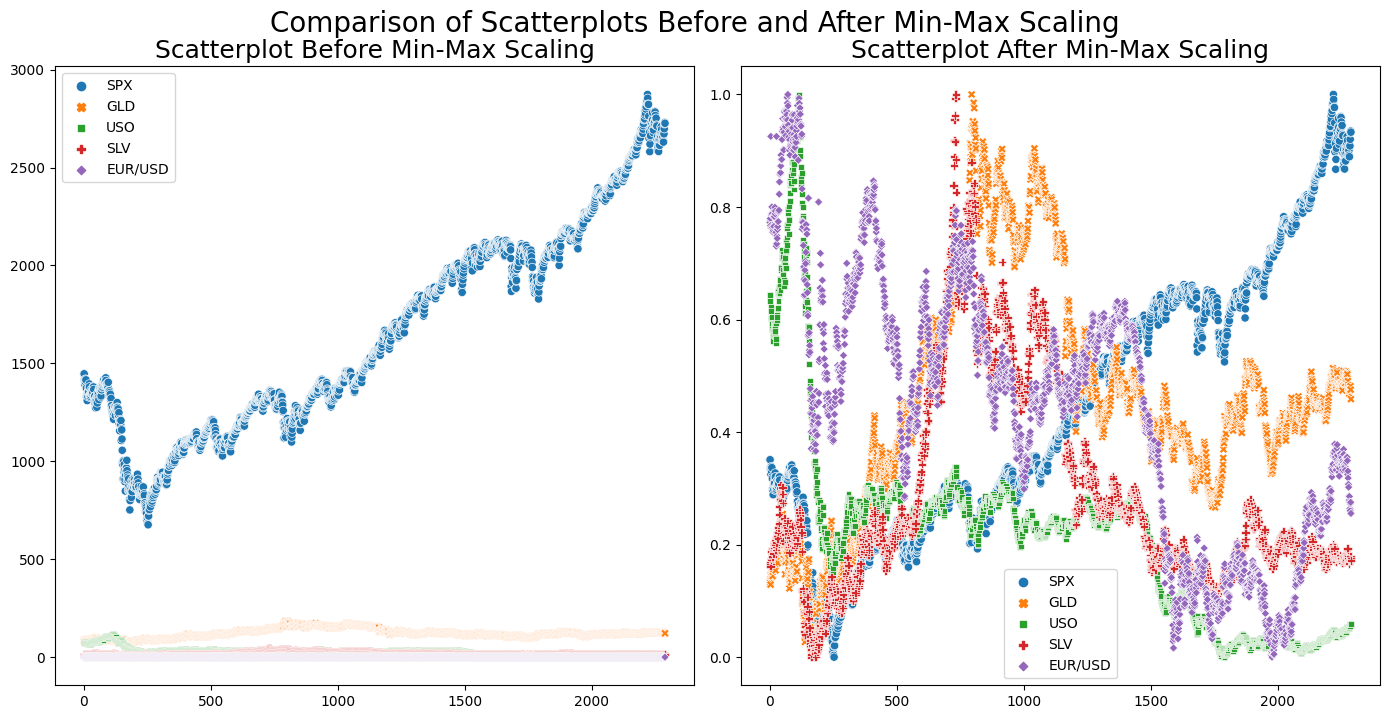

In [10]:
before_scaling_color = "blue"
after_scaling_color = "red"
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].set_title("Scatterplot Before Min-Max Scaling", fontsize=18)
sns.scatterplot(data=df, color=before_scaling_color, ax=axes[0])
axes[1].set_title("Scatterplot After Min-Max Scaling", fontsize=18)
sns.scatterplot(data=df_minmax, color=after_scaling_color, ax=axes[1])
plt.tight_layout()
plt.suptitle("Comparison of Scatterplots Before and After Min-Max Scaling", y=1.02, fontsize=20)
plt.show()

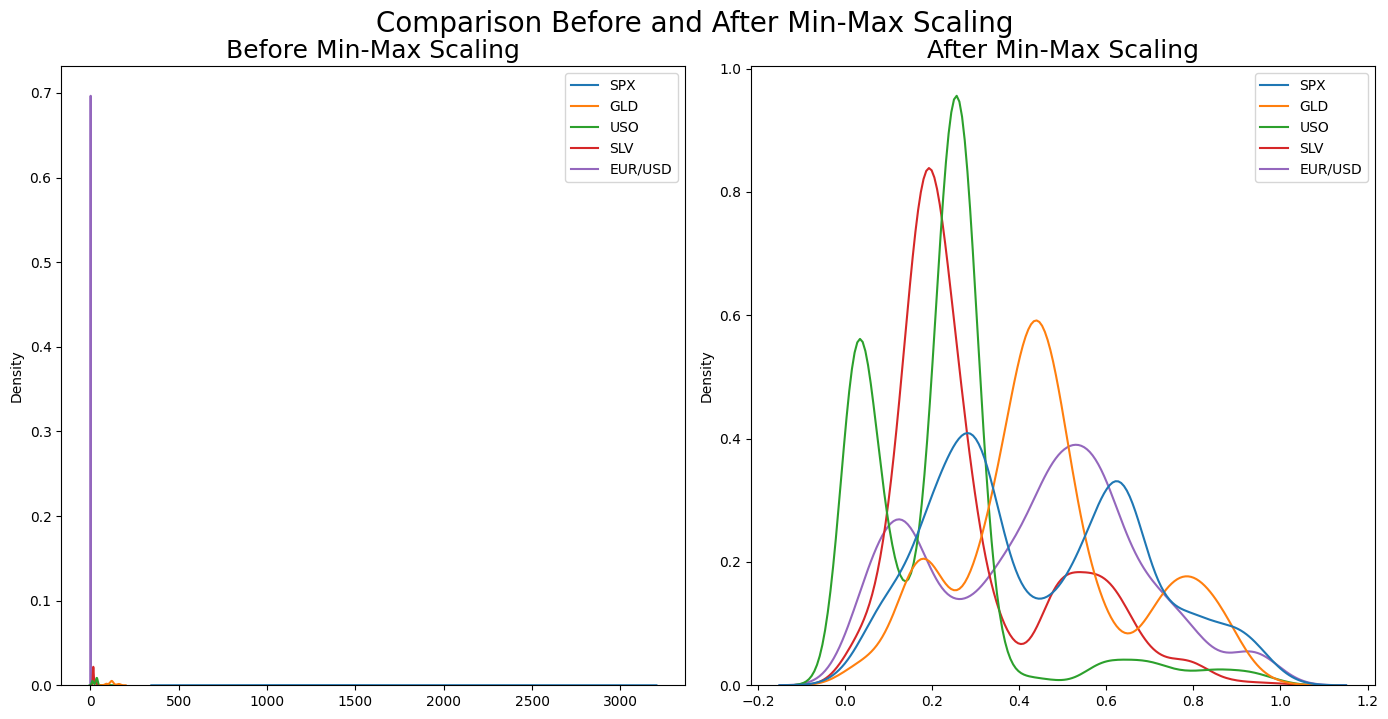

In [11]:
before_scaling_color = "blue"
after_scaling_color = "red"
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].set_title("Before Min-Max Scaling", fontsize=18)
sns.kdeplot(data=df, color=before_scaling_color, ax=axes[0])
axes[1].set_title("After Min-Max Scaling", fontsize=18)
sns.kdeplot(data=df_minmax, color=after_scaling_color, ax=axes[1])
plt.tight_layout()
plt.suptitle("Comparison Before and After Min-Max Scaling", y=1.02, fontsize=20)
plt.show()

**Max Absolute Scaling**

In [12]:
from sklearn.preprocessing import MaxAbsScaler
maxabs = MaxAbsScaler() 
df_maxabs = pd.DataFrame(maxabs.fit_transform(df), columns=df.columns)

In [13]:
df_maxabs.head()

,SPX,GLD,USO,SLV,EUR/USD
0,0.503733,0.459722,0.667943,0.321202,0.920499
1,0.503733,0.463568,0.667092,0.323424,0.922250
2,0.491366,0.461184,0.658069,0.320927,0.922876
3,0.492950,0.459234,0.642663,0.318515,0.918377
4,0.483903,0.470123,0.647429,0.329877,0.973919


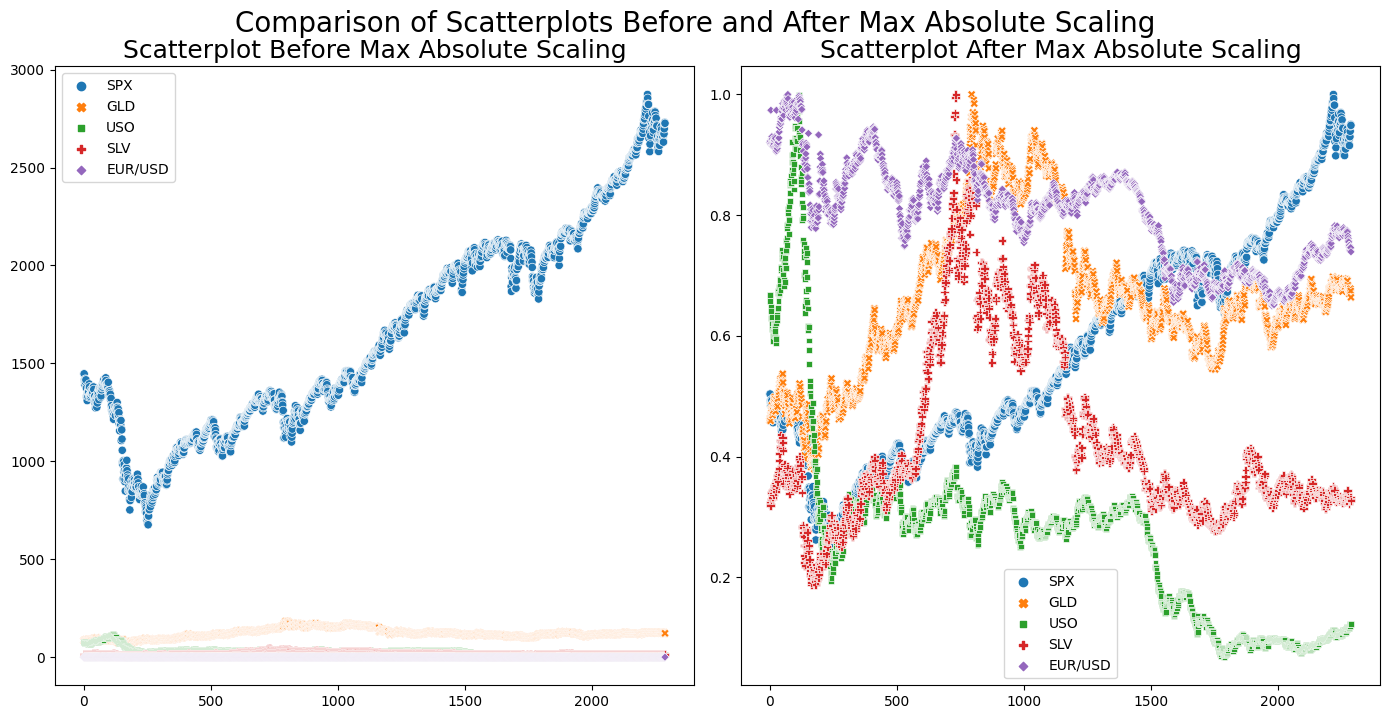

In [14]:
before_scaling_color = "blue"
after_scaling_color = "red"
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].set_title("Scatterplot Before Max Absolute Scaling", fontsize=18)
sns.scatterplot(data=df, color=before_scaling_color, ax=axes[0])
axes[1].set_title("Scatterplot After Max Absolute Scaling", fontsize=18)
sns.scatterplot(data=df_maxabs, color=after_scaling_color, ax=axes[1])
plt.tight_layout()
plt.suptitle("Comparison of Scatterplots Before and After Max Absolute Scaling", y=1.02, fontsize=20)
plt.show()

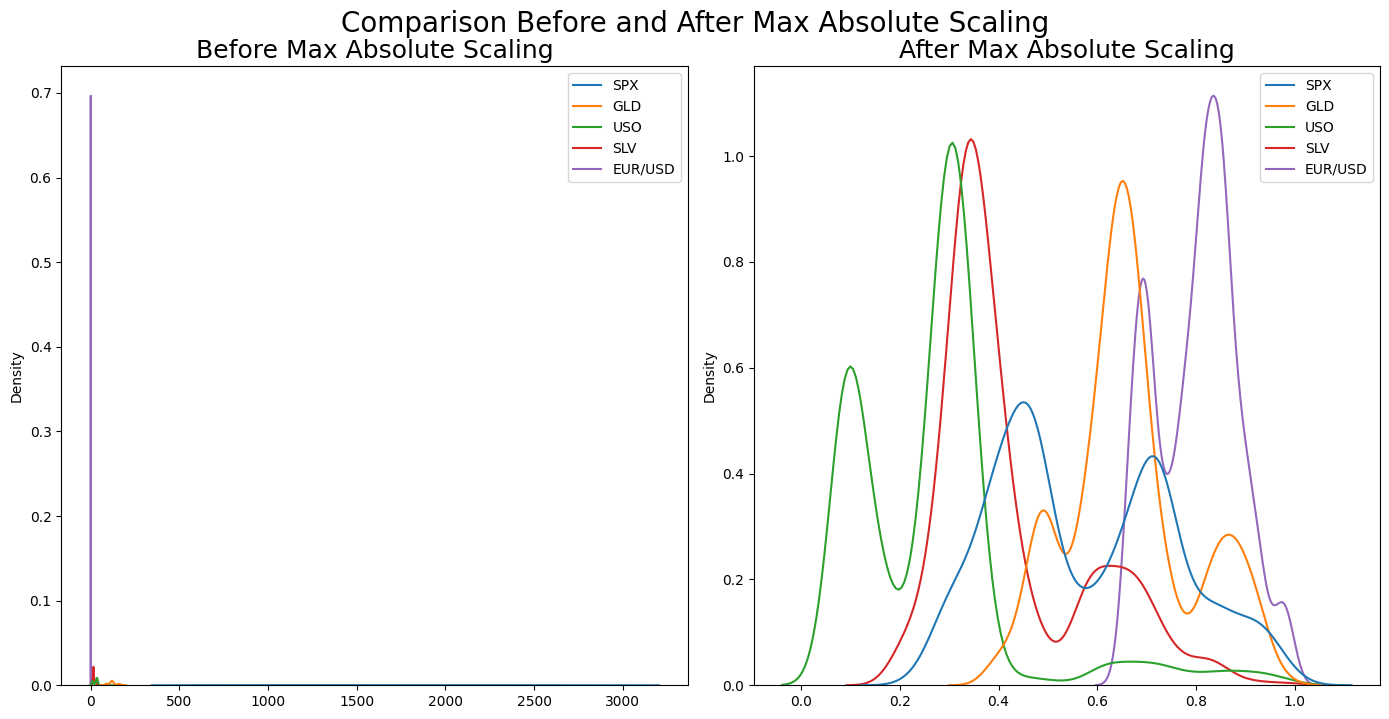

In [15]:
before_scaling_color = "blue"
after_scaling_color = "red"
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].set_title("Before Max Absolute Scaling", fontsize=18)
sns.kdeplot(data=df, color=before_scaling_color, ax=axes[0])
axes[1].set_title("After Max Absolute Scaling", fontsize=18)
sns.kdeplot(data=df_maxabs, color=after_scaling_color, ax=axes[1])
plt.tight_layout()
plt.suptitle("Comparison Before and After Max Absolute Scaling", y=1.02, fontsize=20)
plt.show()

**Robust Scaling**

In [16]:
from sklearn.preprocessing import RobustScaler
robustscale = RobustScaler() 
df_robustscale = pd.DataFrame(robustscale.fit_transform(df), columns=df.columns)

In [17]:
df_robustscale.head()

,SPX,GLD,USO,SLV,EUR/USD
0,-0.125160,-1.545317,1.902122,-0.285607,0.847666
1,-0.125160,-1.514601,1.897857,-0.271248,0.861756
2,-0.167806,-1.533636,1.852649,-0.287385,0.866795
3,-0.162345,-1.549210,1.775456,-0.302974,0.830587
4,-0.193540,-1.462254,1.799339,-0.229538,1.277587


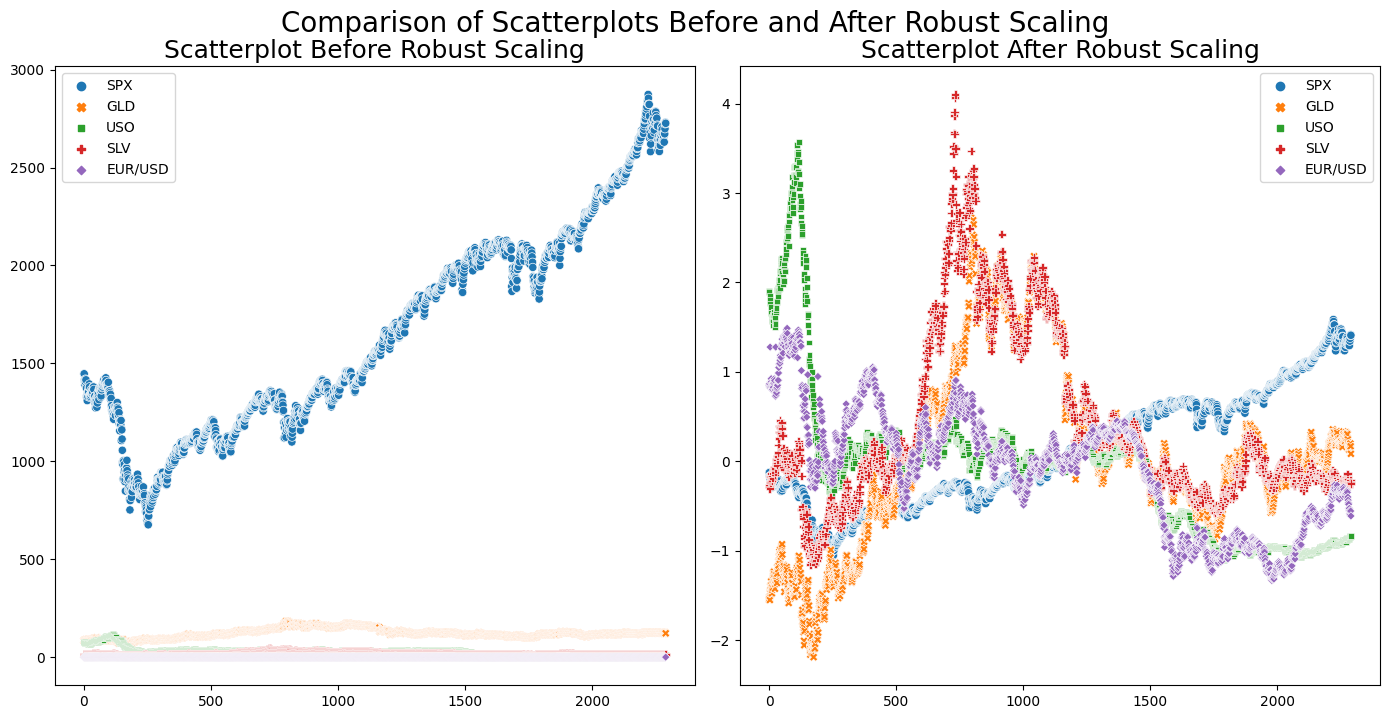

In [18]:
before_scaling_color = "blue"
after_scaling_color = "red"
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].set_title("Scatterplot Before Robust Scaling", fontsize=18)
sns.scatterplot(data=df, color=before_scaling_color, ax=axes[0])
axes[1].set_title("Scatterplot After Robust Scaling", fontsize=18)
sns.scatterplot(data=df_robustscale, color=after_scaling_color, ax=axes[1])
plt.tight_layout()
plt.suptitle("Comparison of Scatterplots Before and After Robust Scaling", y=1.02, fontsize=20)
plt.show()

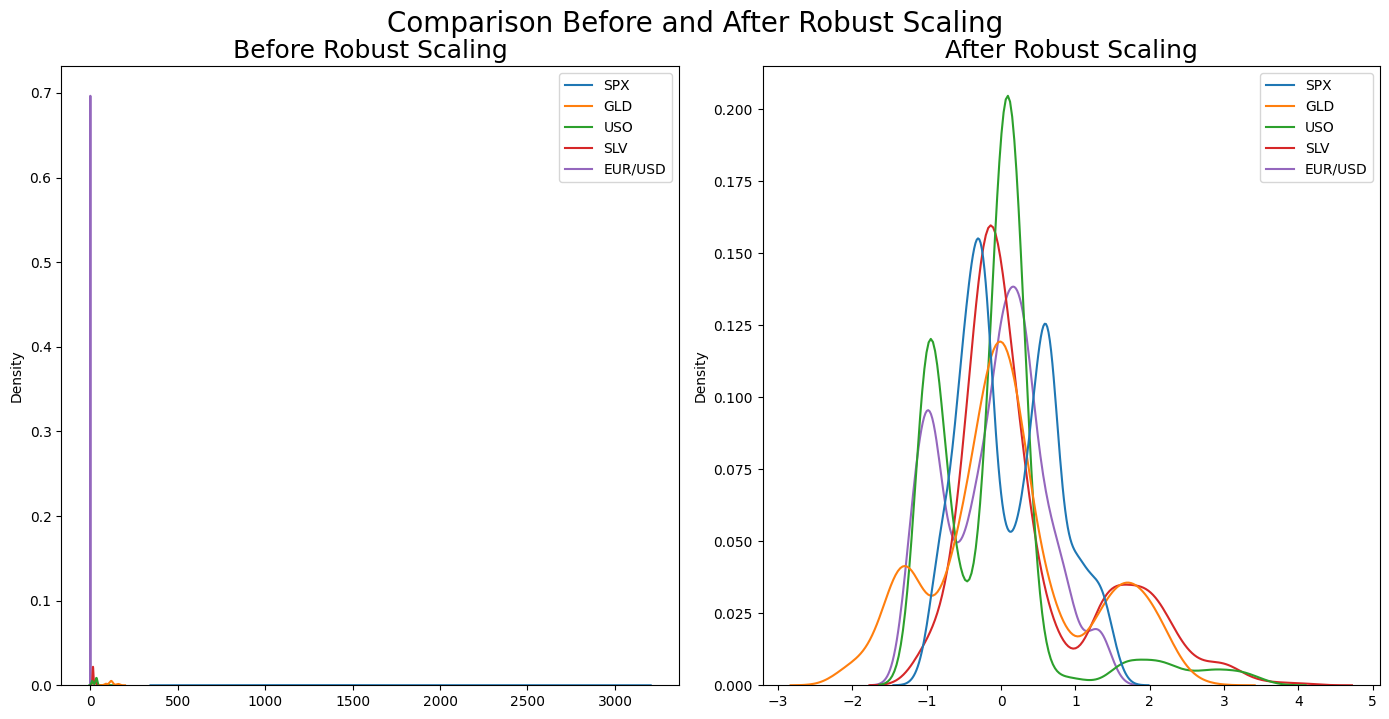

In [19]:
before_scaling_color = "blue"
after_scaling_color = "red"
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].set_title("Before Robust Scaling", fontsize=18)
sns.kdeplot(data=df, color=before_scaling_color, ax=axes[0])
axes[1].set_title("After Robust Scaling", fontsize=18)
sns.kdeplot(data=df_robustscale, color=after_scaling_color, ax=axes[1])
plt.tight_layout()
plt.suptitle("Comparison Before and After Robust Scaling", y=1.02, fontsize=20)
plt.show()

# Standardisation

In [20]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler() 
df_standardscaler = pd.DataFrame(standardscaler.fit_transform(df), columns=df.columns)

In [21]:
df_standardscaler.head()

,SPX,GLD,USO,SLV,EUR/USD
0,-0.399145,-1.626963,2.388810,-0.691720,1.429753
1,-0.399145,-1.596463,2.383687,-0.676912,1.451035
2,-0.467604,-1.615365,2.329381,-0.693553,1.458646
3,-0.458837,-1.630830,2.236652,-0.709630,1.403954
4,-0.508915,-1.544483,2.265342,-0.633900,2.079145


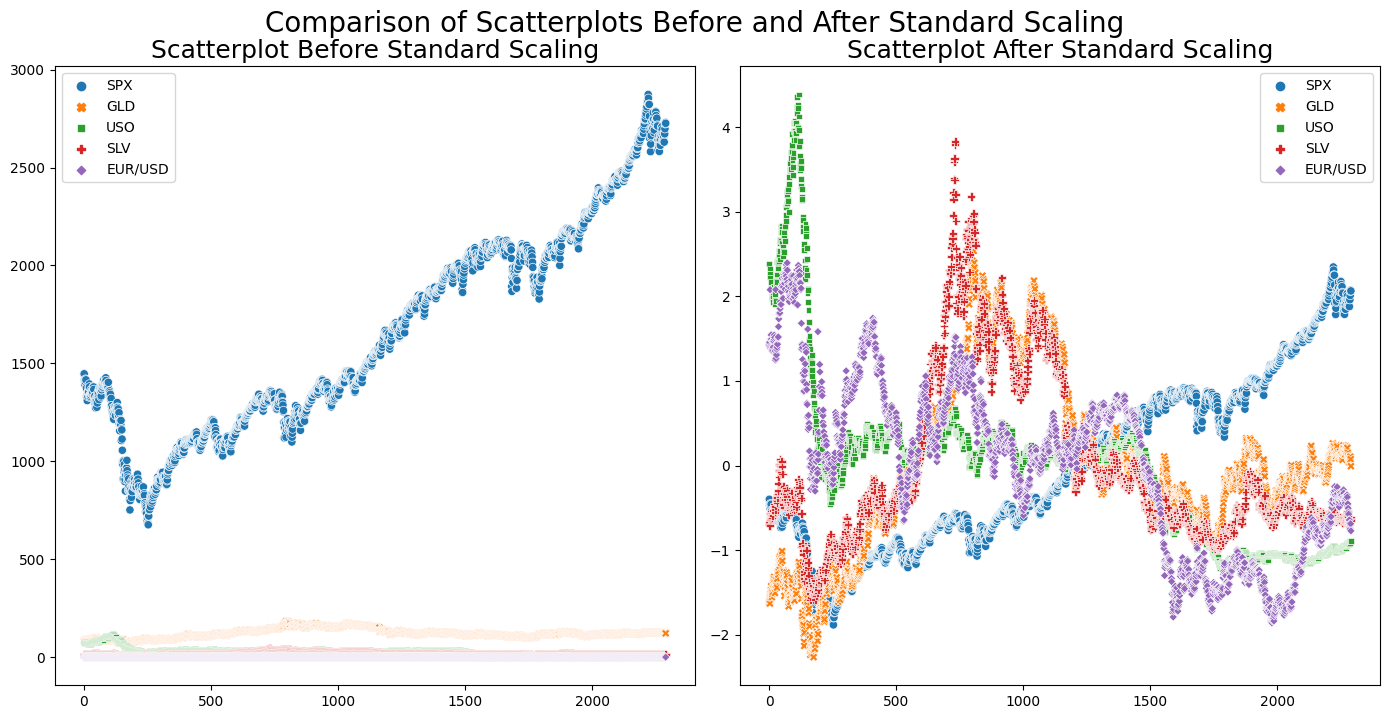

In [22]:
before_scaling_color = "blue"
after_scaling_color = "red"
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].set_title("Scatterplot Before Standard Scaling", fontsize=18)
sns.scatterplot(data=df, color=before_scaling_color, ax=axes[0])
axes[1].set_title("Scatterplot After Standard Scaling", fontsize=18)
sns.scatterplot(data=df_standardscaler, color=after_scaling_color, ax=axes[1])
plt.tight_layout()
plt.suptitle("Comparison of Scatterplots Before and After Standard Scaling", y=1.02, fontsize=20)
plt.show()

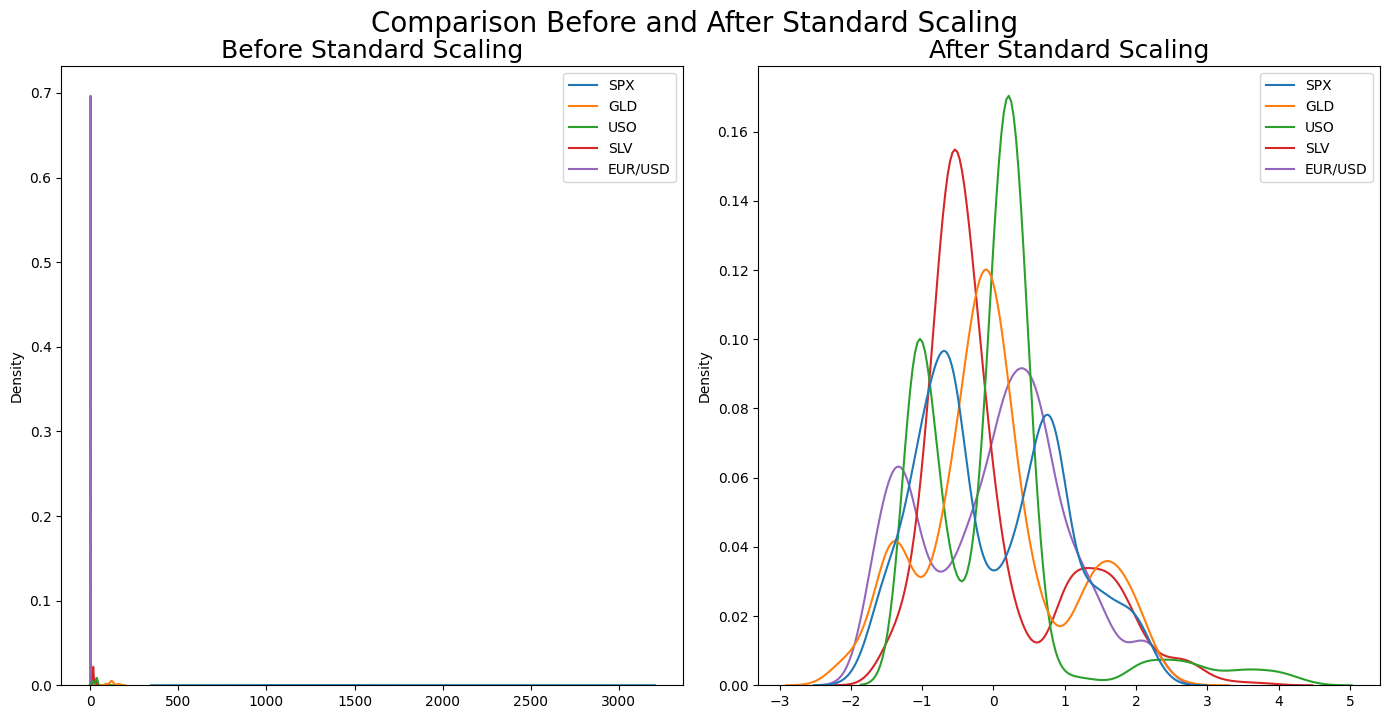

In [23]:
before_scaling_color = "blue"
after_scaling_color = "red"
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].set_title("Before Standard Scaling", fontsize=18)
sns.kdeplot(data=df, color=before_scaling_color, ax=axes[0])
axes[1].set_title("After Standard Scaling", fontsize=18)
sns.kdeplot(data=df_standardscaler, color=after_scaling_color, ax=axes[1])
plt.tight_layout()
plt.suptitle("Comparison Before and After Standard Scaling", y=1.02, fontsize=20)
plt.show()